## Figure 2 - a map of the domain


In [1]:
import xarray as xr
import numpy as np
from scipy.io import loadmat
from cmocean import cm
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [2]:
def plot_map(ax, cst, bounds, grid, T, key, colour, ranmin, ranmax, barlabel, fs):
    """Plot Strait of Georgia study area on Basemap object
    """
    
    # Plot Basemap
    w_map = [-127, -121, 46.5, 51.5]
    m = plot_basemap(ax, w_map, offset=[-30000, -15000], zorder=[0, 1, 7])
    
    # Plot Fraser River
    for bound in bounds:
        i_old = 0
        for i in np.argwhere(np.isnan(cst['ncst'][bound[0]:bound[1], 1]))[:, 0]:
            x, y = m(cst['ncst'][bound[0]:bound[1], 0][i_old:i],
                     cst['ncst'][bound[0]:bound[1], 1][i_old:i])
            ax.plot(x, y, 'k-')
            i_old = i + 1
    
    ### PLOT VARIABLE AND BOX - in this case variable is bathy, if you need to change that, change T_NEMO.variables!
    # Convert lon/lat to x, y
    x, y = m(grid['nav_lon'].values, grid['nav_lat'].values)
    w = T_NEMO.variables[key][:,:]
    C = ax.pcolormesh(x, y, w, cmap=colour, vmin =ranmin, vmax = ranmax)
    
    ax.contourf(x, y, grid['Bathymetry'], [-0.01, 0.01], colors='lightgray', zorder=3)
    ax.contour( x, y, grid['Bathymetry'], [0], colors='Black', zorder=4)

    # Box around model domain
    ax.plot(x[ :,  0], y[ :,  0], 'k-', zorder=6)
    ax.plot(x[ :, -1], y[ :, -1], 'k-', zorder=6)
    ax.plot(x[ 0,  :], y[ 0,  :], 'k-', zorder=6)
    ax.plot(x[-1,  :], y[-1,  :], 'k-', zorder=6)
    
    # Colorbar
    #original cax pposition: cax = fig.add_axes([0.15, 0.1, 0.73, 0.01])
    cax = fig.add_axes([0.15, 0.1, 0.73, 0.025])
    
    cbar = fig.colorbar(C, cax=cax, orientation='horizontal')
    cbar.ax.tick_params(labelsize=22)
    cbar.set_label(label= 'Bathymetry (m)', size=25)
    




    # Define Significant Landmarks and Locations
    annotations = {
        'Pacific\nOcean'     : {'text': [0.10, 0.250], 'font': fs, 'rotate':   0, 'textcol' : 'k', 'color': 'r', 'marker': None, 'arrow': None},
        'British\nColumbia'  : {'text': [0.65, 0.850], 'font': fs, 'rotate':   0, 'textcol' : 'k','color': 'r', 'marker': None, 'arrow': None},
        'Washington\nState'  : {'text': [0.70, 0.030], 'font': fs, 'rotate':   0, 'textcol' : 'k', 'color': 'r', 'marker': None, 'arrow': None},
        'Puget\nSound'       : {'text': [0.55, 0.120], 'font': fs, 'rotate':   0, 'textcol' : 'k','color': 'r', 'marker': None, 'arrow': None},
       'Vancouver'          : {'text': [0.68, 0.550], 'font': fs, 'rotate':   0, 'textcol' : 'k','color': 'r', 'marker': [-123.10, 49.25], 'arrow': None},
        'Victoria'           : {'text': [0.495, 0.380], 'font': fs, 'rotate':   0, 'textcol' : 'k','color': 'r', 'marker': [-123.37, 48.43], 'arrow': None},
        'Seattle'            : {'text': [0.81, 0.230], 'font': fs, 'rotate':   0, 'textcol' : 'k','color': 'r', 'marker': [-122.33, 47.61], 'arrow': None},
          }
   
    ## Other annotations that may or may not be relevant!
        #'Vancouver\nIsland'  : {'text': [0.12, 0.680], 'font': 14, 'rotate':   0, 'color': 'r', 'marker': None, 'arrow': None},
        #'Vancouver\nIsland'  : {'text': [0.40, 0.470], 'font': 14, 'rotate':   0, 'color': 'r', 'marker': None, 'arrow': None},
         #'Coast Mountains'    : {'text': [0.60, 0.800], 'font': fs, 'rotate': -40, 'textcol' : 'k', 'color': 'r', 'marker': None, 'arrow': None},
        #'Strait of Georgia'  : {'text': [0.50, 0.575], 'font': fs, 'rotate': -40, 'textcol' : 'w','color': 'w', 'marker': None, 'arrow': None},
        #'Juan de Fuca Strait': {'text': [0.36, 0.400], 'font': 22, 'rotate': -21, 'textcol' : 'k','color': 'r', 'marker': None, 'arrow': None},
        #'Fraser River'       : {'text': [0.76, 0.530], 'font': fs, 'rotate':  15, 'textcol' : 'k','color': 'r', 'marker': None, 'arrow': None},
         #'Hood\nCanal'        : {'text': [0.62, 0.210], 'font': 13, 'rotate':   0, 'color': 'r', 'marker': None, 'arrow': None},
        #'Discovery\nIslands' : {'text': [0.44, 0.720], 'font': 13, 'rotate':   0, 'color': 'r', 'marker': None, 'arrow': None},
        #'Baynes\nSound'      : {'text': [0.26, 0.590], 'font': 13, 'rotate':   0, 'color': 'r', 'marker': None, 'arrow': None},
         #'Hope'               : {'text': [0.93, 0.550], 'font': 12, 'rotate':   0, 'color': 'r', 'marker': [-121.44, 49.39], 'arrow': None},


    # Timestamp or bottom text if U want it!
    #ax.text(0.02, 0.01, '20 March 2016 Daily Average', fontsize = fs , transform=ax.transAxes)
    
    # Plot Annotations
    plot_annotations(ax, m, annotations, zorder=7)
    
def plot_basemap(ax, w_map, lons=None, lats=None, offset=[None, None], zorder=[0, 1, 2]):
    """
    """
    
    # Define map window
    lon_0 = (w_map[1] - w_map[0]) / 2 + w_map[0]
    lat_0 = (w_map[3] - w_map[2]) / 2 + w_map[2]

    # Make projection
    m = Basemap(projection='lcc', resolution='h',
                lon_0=lon_0, lat_0=lat_0,
                llcrnrlon=w_map[0], urcrnrlon=w_map[1],
                llcrnrlat=w_map[2], urcrnrlat=w_map[3], ax=ax)
    
    # Default lon/lat intervals
    if lons is None:
        lons = np.floor([w_map[0], w_map[1] + 1])
    if lats is None:
        lats = np.floor([w_map[2], w_map[3] + 1])
    
    # Add features and labels
    m.drawcoastlines(zorder=zorder[1])
    m.fillcontinents(color='Burlywood', zorder=zorder[0])
    m.drawmeridians(np.arange(*lons), labels=[0, 0, 1, 0], color='dimgray', yoffset=offset[1], zorder=zorder[2], fontsize = 20)
    m.drawparallels(np.arange(*lats), labels=[0, 1, 0, 0], color='dimgray', xoffset=offset[0], zorder=zorder[2], fontsize = 20)
    
    return m

def plot_annotations(ax, m, annotations, zorder=None):
    """
    """
    
    # Plot Locations
    for annotation_label, annotation in annotations.items():
        ax.text(*annotation['text'], annotation_label, transform=ax.transAxes,
                fontsize=annotation['font']+1, color=annotation['textcol'], rotation=annotation['rotate'], zorder=zorder)
        if annotation['marker'] is not None:
            x, y = m(*annotation['marker'])
            ax.plot(x, y, 'ko', markersize=8, markerfacecolor=annotation['color'], zorder=zorder)
        if annotation['arrow'] is not None:
            ax.arrow(*annotation['arrow'], head_width=0.01, fc='k', transform=ax.transAxes, zorder=zorder)

In [3]:
# Load NEMO grid
grid_NEMO = xr.open_dataset(
    '/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)

#T_NEMO for a variable
#T_NEMO = xr.open_dataset('/results/SalishSea/nowcast-green.201812/04apr18/SalishSea_1d_20180404_20180404_ptrc_T.nc')

#T_nebo for bathymetry
T_NEMO = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)

# Load Fraser coastline
PNWrivers = loadmat('/ocean/rich/more/mmapbase/bcgeo/PNWrivers.mat')


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: No contour levels were found within the data range.


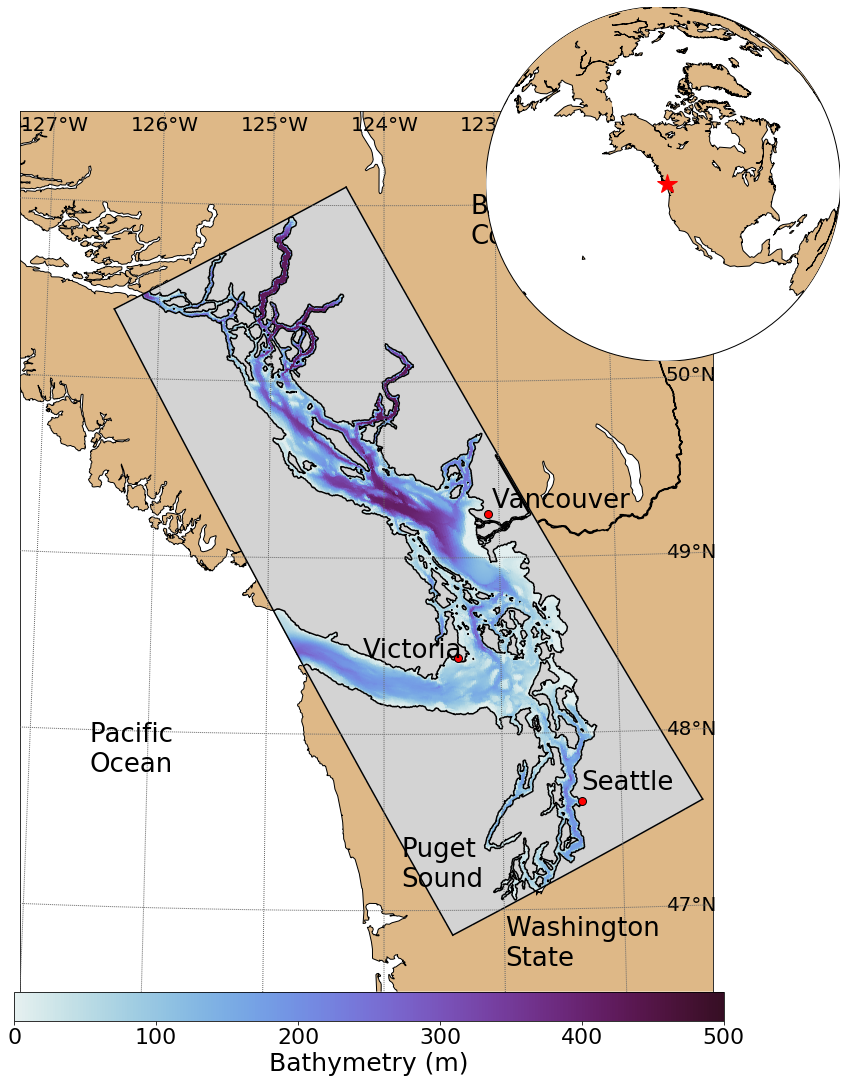

In [7]:
# Define Fraser coastline regions
bounds = [[0, 26000], [61500, 77000], [107500, 114000], [200000, 203000], [326000, 327000]]
 
fact = 0.9 
# Make figure window
fig, ax1 = plt.subplots(1, 1, figsize=(15*fact, 18*fact))

# Plot Model Domain
plot_map(ax1, PNWrivers, bounds, grid_NEMO, T_NEMO, 'Bathymetry', cm.dense, 0, 500, 'bathymetry' , 25 )

ax2   = fig.add_axes([0.635, 0.635, 0.365, 0.365])

map = Basemap(projection='ortho', 
              lat_0=50, lon_0=-127)
map.drawmapboundary(fill_color='white')
map.fillcontinents(color='Burlywood',lake_color='white')
map.drawcoastlines()

x, y = map(-125, 50)

map.plot(x, y, marker='*',color='r', markersize = 20)
fig.savefig('./paper_figs/MF02_map.png', transparent=True, dpi=600, bbox_inches='tight')



